In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('//content/drive/MyDrive/Titanic.csv',encoding='Latin 1')

# EXPLORATORY DATA ANALYSIS ON THE DATASET:

In [ ]:
df.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [ ]:
df.columns

Index(['Name', 'PClass', 'Age', 'Sex', 'Survived'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1312 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [ ]:
df.shape

(1313, 5)

In [ ]:
df.isnull()

,Name,PClass,Age,Sex,Survived
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1308,False,False,False,False,False
1309,False,False,False,False,False
1310,False,False,False,False,False
1311,False,False,False,False,False


In [ ]:
df.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]       #List Comprehension

['PClass', 'Age']

<Axes: >

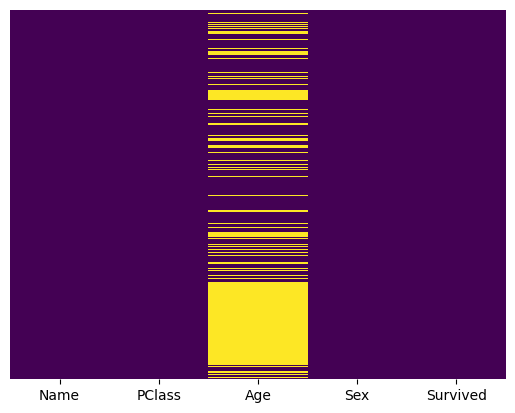

In [ ]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False, cmap='viridis')

OBSERVATION 1: The above heatmap shows the distribution of Null values in the dataset. As we can see, the null values are widely spread in column Age. Approx.60% of Age data is not known.

In [ ]:
df.PClass.value_counts()

3rd    711
1st    322
2nd    279
Name: PClass, dtype: int64

In [ ]:
PClass_names=df.PClass.value_counts().index
PClass_names

Index(['3rd', '1st', '2nd'], dtype='object')

In [ ]:
PClass_val=df.PClass.value_counts().values
PClass_val

array([711, 322, 279])

([<matplotlib.patches.Wedge at 0x7adcf365e860>,
 [Text(-0.14444920521386076, 1.0904744046116277, '3rd'),
  Text(-0.5621205948938915, -0.9455265394456878, '1st'),
  Text(0.8635223790725123, -0.6814169801530842, '2nd')],
 [Text(-0.07879047557119677, 0.5948042206972515, '54.19%'),
  Text(-0.3066112335784863, -0.5157417487885569, '24.54%'),
  Text(0.4710122067668248, -0.3716819891744095, '21.27%')])

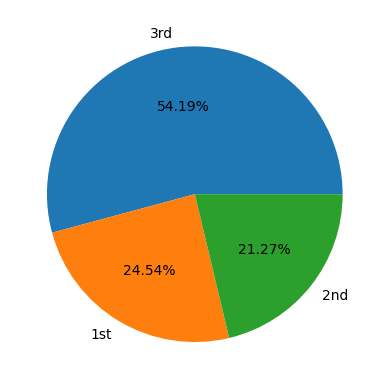

In [ ]:
plt.pie(PClass_val,labels=PClass_names,autopct='%1.2f%%')

OBSERVATION 2: MAXIMUM PASSENGERS WERE TRAVELLING IN 3RD CLASS. AFTER THAT, 1ST CLASS AND THEN, 2ND CLASS.

In [ ]:
Sex_class=df.Sex.value_counts()
Sex_class

male      851
female    462
Name: Sex, dtype: int64

In [ ]:
Sex_names=df.Sex.value_counts().index
Sex_names

Index(['male', 'female'], dtype='object')

In [ ]:
Sex_val=df.Sex.value_counts().values
Sex_val

array([851, 462])

([<matplotlib.patches.Wedge at 0x7adcf36c9f90>,
 [Text(-0.4936355687232252, 0.9830177644840902, 'male'),
  Text(0.49363556872322506, -0.9830177644840903, 'female')],
 [Text(-0.2692557647581228, 0.5361915079004127, '64.81%'),
  Text(0.26925576475812274, -0.5361915079004128, '35.19%')])

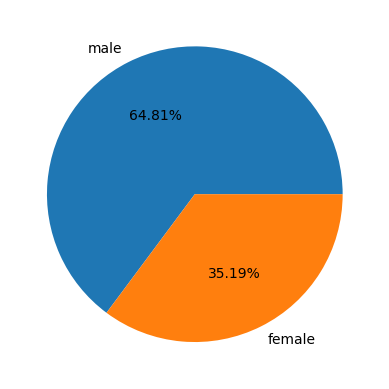

In [ ]:
plt.pie(Sex_val, labels=Sex_names, autopct='%1.2f%%')

OBSERVATION 3: From the above Pie chart, we can see that 64.81% of the total passengers travelling were males, and rest were females.

<Axes: xlabel='Survived', ylabel='count'>

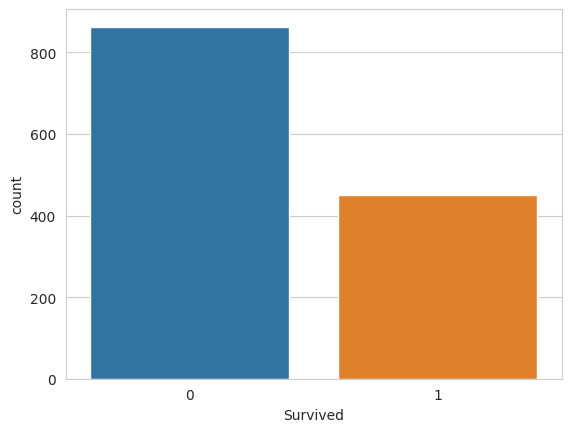

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

OBSERVATION 4: From the above bar plot, we can see the count of passengers who survived and who didnot survive.
    
    Here, 0:Passenger didnot survive and 1: Passenger survived.

Around 850 passengers didnot survive while approximately 420 passengers survived who were travelling in Titanic according to our Dataset.

<Axes: xlabel='Survived', ylabel='count'>

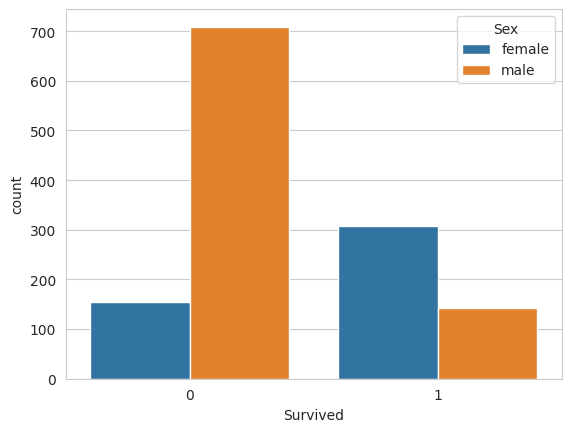

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

OBSERVATION 5: The above bar plot shows that:
1. Less Number of male survived then female.
2. More number of male died than female.
3. Approx 150 females didnot survive.
4. Around 700 males didnot survive.
5. Approx 300 females survived.
6. Around 150 males survived.

<Axes: xlabel='Survived', ylabel='count'>

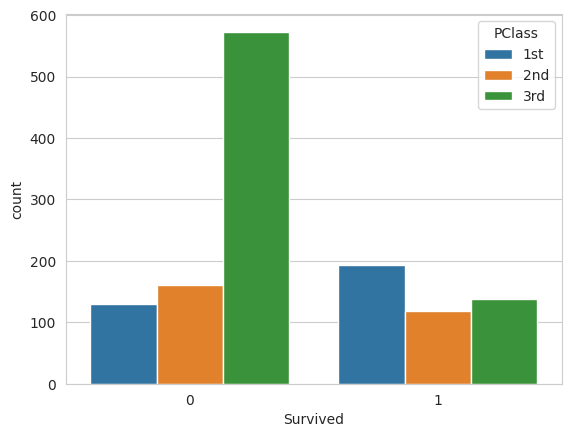

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='PClass',data=df)

OBSERVATION 6: The above bar plot shows the count of survival based on the class in which the passenger is travelling.

From the above plot, we can see:
1. Maximum numbers of passengers who did not survive were travelling in 3rd Class.
2. Maximum numbers of passengers who survived were travelling in 1st class.

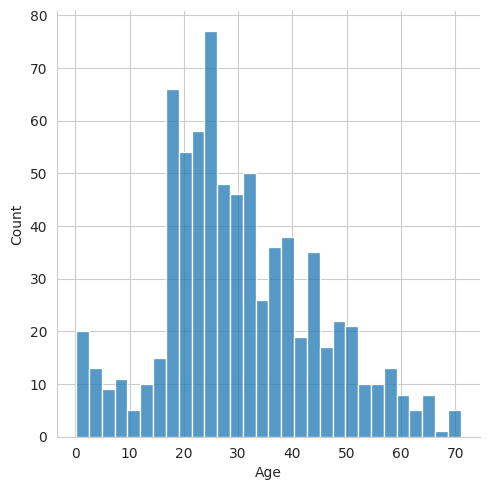

In [ ]:
sns.displot(df['Age'].dropna(),kde=False, bins=30)

OBSERVATION 7: From the above histogram, we can see a rough bell-shaped curve indicating that the Age is normally distributed (after removing the outliers).

# HANDLING NaN VALUES IN THE DATASET:

<Axes: xlabel='PClass', ylabel='Age'>

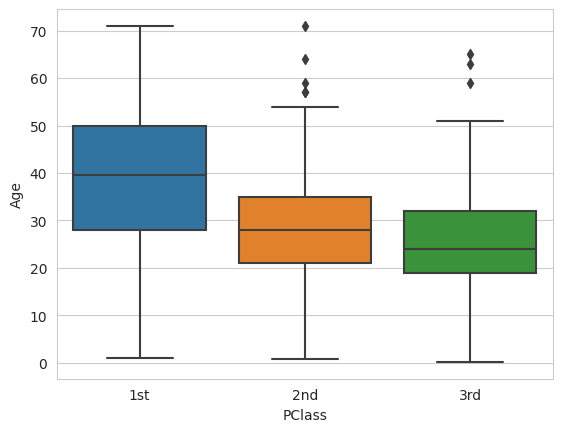

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(x='PClass',y='Age',data=df)

OBSERVATION 8: From the above boxplot, we can see the distribution of Age wrt to the PClass.

Now, in order to handle the NaN Values in Age column. We will be impute the Mean Age of the Passengers travalling in a respective class.

From the boxplot:
1. Average age of passenger travelling PClass 1st is close to 40, so taking it as 39.
2. Average age of passenger travelling in PClass 2nd is 28.
3. Average age of passenger travelling in PClass 3rd is 24.


Now, defining a function impute_age() to replace the NaN values with the respective mean age based on the PClass in which the passenger is travelling.

In [ ]:
def impute_age(cols):
  Age=cols[0]
  PClass=cols[1]
  if pd.isnull(Age):
    if PClass=='1st':
      return 39
    elif PClass=='2nd':
      return 28
    else:
      return 24
  else:
    return Age

In [ ]:
df['Age']=df[['Age','PClass']].apply(impute_age,axis=1)

<Axes: >

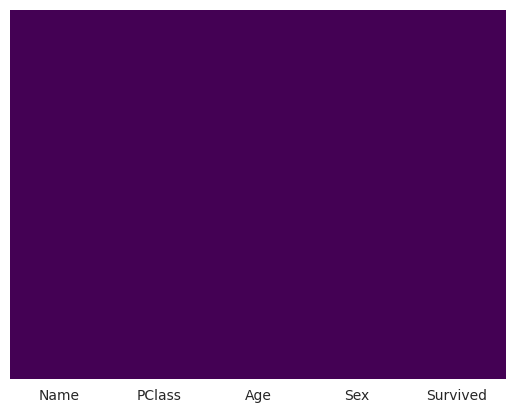

In [ ]:
sns.heatmap(df.isnull(),yticklabels= False, cbar=False, cmap='viridis')

OBSERVATION 9: From the above heatmap, we can see that we have managed to impute the missing NaN values, and now the Column Age has no missing values.

In [ ]:
df.isnull().sum()

Name        0
PClass      1
Age         0
Sex         0
Survived    0
dtype: int64

OBSERVATION 10: We still have one NaN value in PClass. Imputing that value with the 3rd Class as from the previous observation (OBSERVATION 2), we know that maximum number of passengers were travelling in 3rd Passenger Class.

In [ ]:
df.loc[df['PClass'].isnull(), 'PClass'] = '3rd'

In [ ]:
df.isnull().sum()

Name        0
PClass      0
Age         0
Sex         0
Survived    0
dtype: int64

OBSERVATION 11: We have successfully handled all the NaN values in the dataset.

# CONVERTING CATEGORICAL FEATURES:
We will be converting categorical feature Sex in order to work further with Machine learning algorithms.

In [ ]:
sex=pd.get_dummies(df['Sex'], drop_first= True)
sex

,male
0,0
1,0
2,1
3,0
4,1
...,...
1308,1
1309,1
1310,1
1311,1


From the above, we have created dummies for Sex.
0 means female and 1 means male.

In [ ]:
#We can't process any fruitful analysis using Name column. Dropping Name along with Sex column.
df.drop(['Name','Sex'],axis=1, inplace= True)

In [ ]:
df.head()

,PClass,Age,Survived
0,1st,29.00,1
1,1st,2.00,0
2,1st,30.00,0
3,1st,25.00,0
4,1st,0.92,1


Now, concating the sex column to the dataset.

In [ ]:
df=pd.concat([df,sex],axis=1)

In [ ]:
df.head()

,PClass,Age,Survived,male
0,1st,29.00,1,0
1,1st,2.00,0,0
2,1st,30.00,0,1
3,1st,25.00,0,0
4,1st,0.92,1,1


In [ ]:
df = df.rename(columns={'male': 'Sex'})

In [ ]:
df.head()

,PClass,Age,Survived,Sex
0,1st,29.00,1,0
1,1st,2.00,0,0
2,1st,30.00,0,1
3,1st,25.00,0,0
4,1st,0.92,1,1


In column named Sex, 0 symbolises Female and 1 symbolises Male.

Since the column PClass has values as {1st,2nd,3rd} updating them as {1,2,3} respectively in order to make the data ready for building model.

In [ ]:
df.loc[df['PClass'] == '2nd', 'PClass'] = 2

In [ ]:
df.loc[df['PClass'] == '1st', 'PClass'] = 1
df.loc[df['PClass'] == '3rd', 'PClass'] = 3

In [ ]:
df.head()

,PClass,Age,Survived,Sex
0,1,29.00,1,0
1,1,2.00,0,0
2,1,30.00,0,1
3,1,25.00,0,0
4,1,0.92,1,1


# Building a Logistic regression model:


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.30,random_state=42)

Spliting the data , setting the test size as 30% and setting the random_state as 42 which ensures randomness and eliminates biasedness in spliting the data into train and test.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[235,  10],
       [ 59,  90]])

OBSERVATION 12: This shows that the model correctly predicted the positive class that is the passenger survived is 235 and correctly predicted the negative class that is the passenger did not survive is 90.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_percent=accuracy_score(y_test,predictions)
accuracy_percent

0.8248730964467005

OBSERVATION 13: This shows that our model predicted with a accuracy of 82.487% which is approximately equal to 82.5%.